In [30]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
cd D:\Programming\Projects\major_project

D:\Programming\Projects\major_project


Finding the count of files in each folder

In [15]:
path = 'Dataset/ASR/openslr'
no_of_folders = len(os.listdir(path))
files_count_dict = {}
for folder in os.listdir(path):
    files_count_dict[folder] = len(os.listdir(path+'/'+folder))
files_count_df = pd.DataFrame(files_count_dict.items(),columns=["foldername","count"])

Total there are 244 folders in dataset

In [32]:
no_of_folders

244

59 folders have less than 600 files but greater than 550

In [38]:
less_600_df = files_count_df[files_count_df['count']  < 600]
less_600_df.shape

(59, 2)

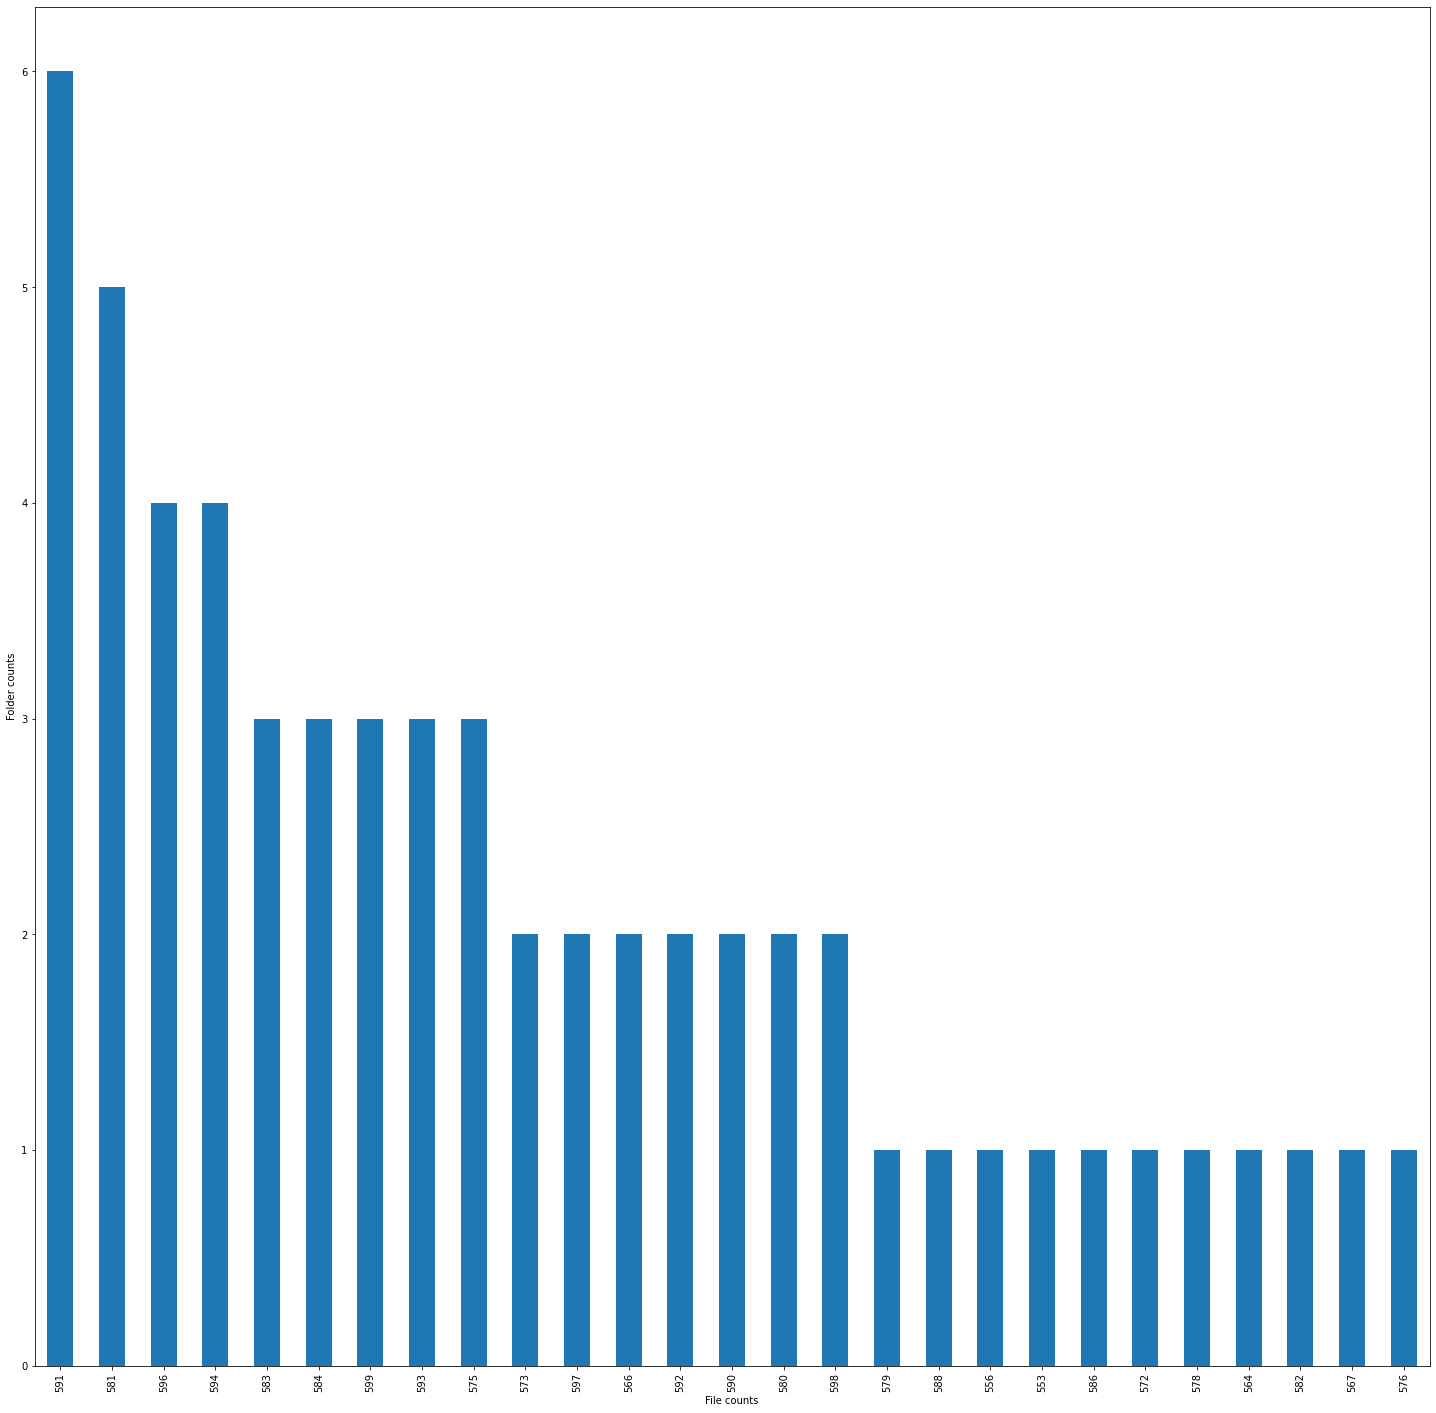

In [65]:
val1 = less_600_df['count'].value_counts()
fig = plt.figure(figsize=(25,25))
plt.xlabel('File counts')
plt.ylabel('Folder counts')
val1.plot.bar()
plt.show()

183 folders have 600+ files but less than 690

In [39]:
more_600_df = files_count_df[files_count_df['count']  >= 600]
more_600_df.shape

(185, 2)

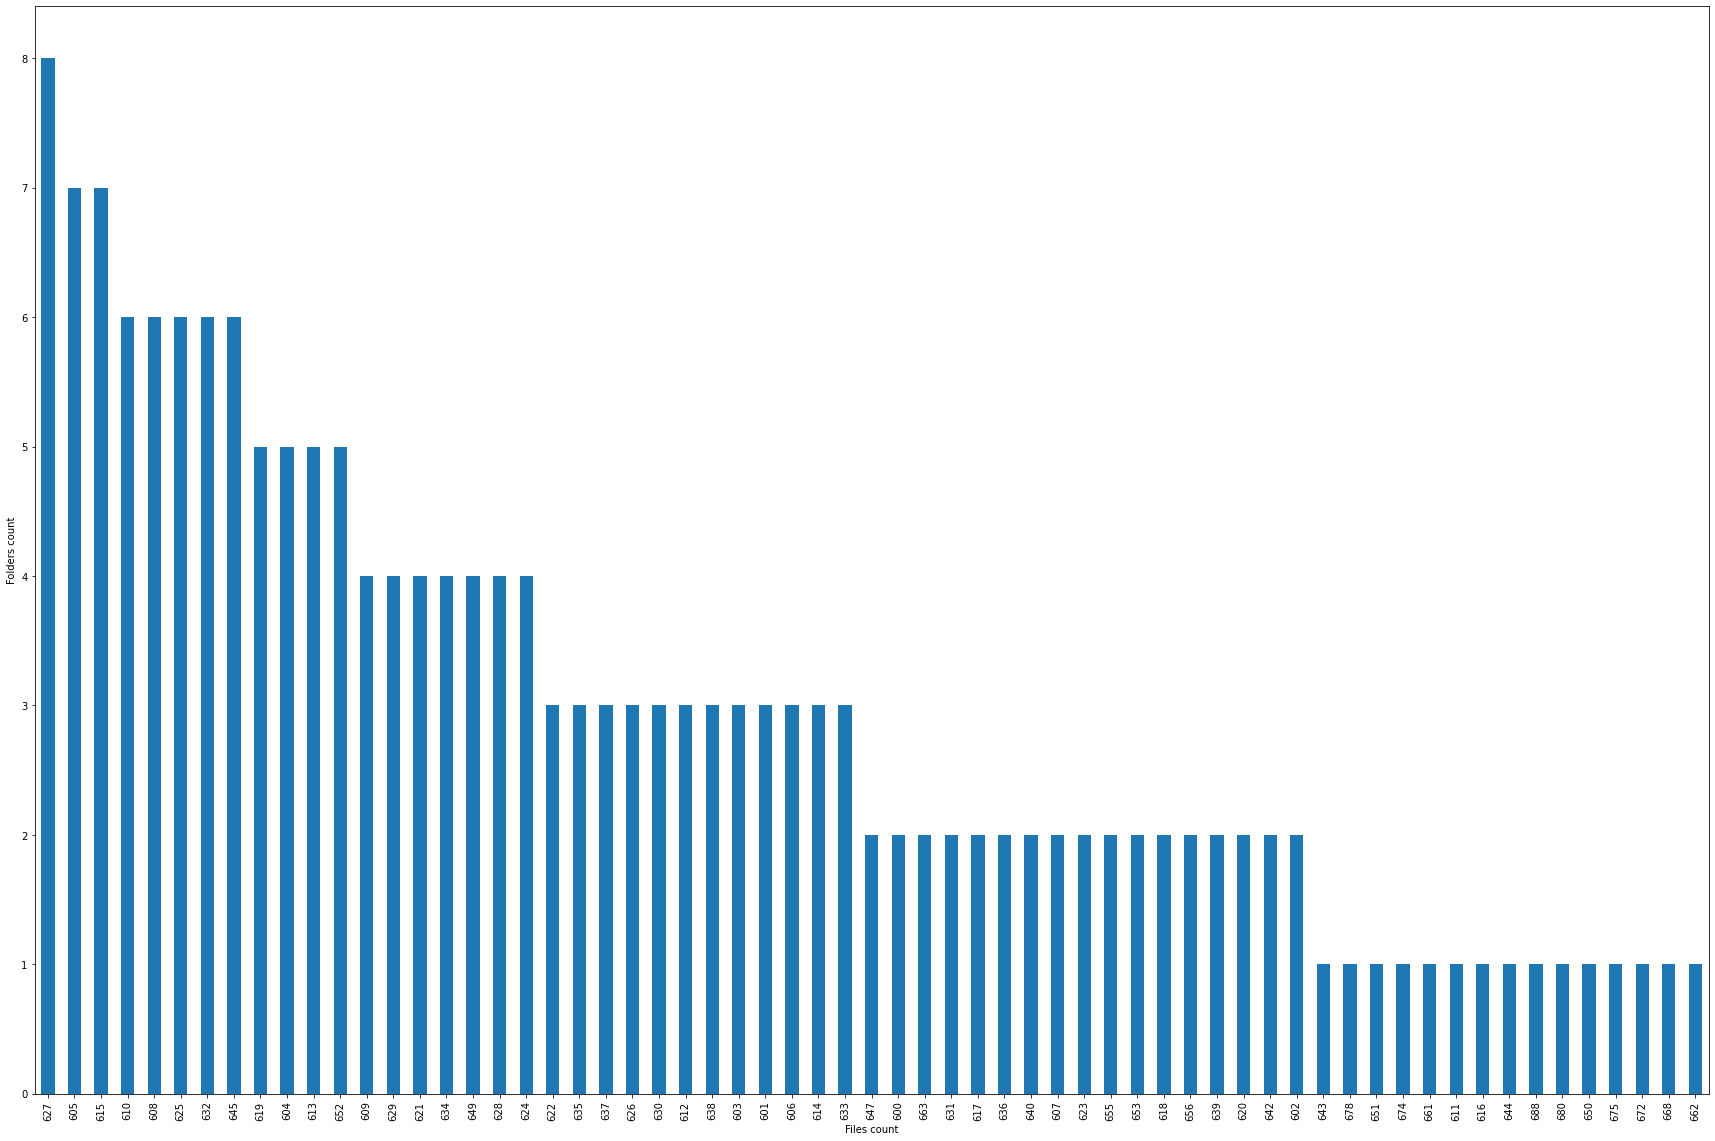

In [64]:
val2 = more_600_df['count'].value_counts()
fig = plt.figure(figsize=(30,20))
plt.xlabel('Files count')
plt.ylabel('Folders count')
val2.plot.bar()
plt.show()

After checking no of files we can conclude that the no of files in each folder is between 550 and 690 so there is not much difference in count of files so, sampling may not be needed.

To generate a csv file based on the contents of folder

In [37]:
path = 'Dataset/ASR/openslr'
files_dict = {}
for folder in os.listdir(path):
    # print(folder)
    for file_name in os.listdir(path + '/' + folder):
        if file_name.endswith('.flac'):
            filepath = path + '/' + folder + '/' + file_name
            filename, extension = os.path.splitext(file_name)
            files_dict[filename] = filepath 

print(len(files_dict.keys()))


150540


In [39]:
files_df = pd.DataFrame(files_dict.items(),columns=["filename","filepath"])
files_df.head()

,filename,filepath
0,0000c0f43b,Dataset/ASR/openslr/00/0000c0f43b.flac
1,00014b6780,Dataset/ASR/openslr/00/00014b6780.flac
2,0001b0e4b4,Dataset/ASR/openslr/00/0001b0e4b4.flac
3,0001cf394a,Dataset/ASR/openslr/00/0001cf394a.flac
4,00024e9ee7,Dataset/ASR/openslr/00/00024e9ee7.flac


In [40]:
files_df.to_csv('name_and_paths.csv')

This is the csv file found in the dataset

In [26]:
df1 = pd.read_csv('D:/Programming/Projects/major_project/Dataset/ASR/openslr_text.csv')
df1.head()

,loc,id,labels
0,4aa1fdca33,6a6d1,००७ मिलको दूरीमा
1,86e521554a,1f680,००७ मिलको दूरीमा
2,c96b2b1afb,e349f,००७ मिलको दूरीमा
3,2f7ab41953,294d8,०११ देखि काङ्ग्रेसको
4,c290e5124b,88901,०१ सौर द्रव्यमान


We merge 2 datafranes based on loc and filename so that the csv will only contain data for the files we have in our folders

In [41]:
df3 = pd.merge(files_df,df1,left_on='filename',right_on='loc')
df3.shape

(149988, 5)

In [43]:
df3.tail()

,filename,filepath,loc,id,labels
149983,fffe93ed54,Dataset/ASR/openslr/ff/fffe93ed54.flac,fffe93ed54,09eb9,खाल्डो खनी पोखरीको
149984,ffff8b1260,Dataset/ASR/openslr/ff/ffff8b1260.flac,ffff8b1260,e4596,लामो हुन्छ
149985,ffffc0c531,Dataset/ASR/openslr/ff/ffffc0c531.flac,ffffc0c531,d0cd7,रिहा गराउनको आमाग
149986,fffff63362,Dataset/ASR/openslr/ff/fffff63362.flac,fffff63362,7ef78,यस पर्वमा चोखो
149987,fffff812f5,Dataset/ASR/openslr/ff/fffff812f5.flac,fffff812f5,89bd3,कला पढाइसकेका अनुभवी


This csv file will contain merged df including filename, filepath, loc, id and labels

In [44]:
df3.to_csv('correct_path.csv')

Now creating the csv file with only filename, filepath, id and labels. This will be used for both wav2vec and CNN 

In [67]:
df = pd.read_csv('D:\Programming\Projects\major_project\Dataset\ASR\correct_path.csv')
req_df = df[["filename","filepath","id","labels"]]
req_df.head()
# req_df.to_csv("asr_dataset1.csv")

,filename,filepath,id,labels
0,0000c0f43b,Dataset/ASR/openslr/00/0000c0f43b.flac,5bc3b,अवस्थालाई ज्योतिषमा
1,00014b6780,Dataset/ASR/openslr/00/00014b6780.flac,c7f92,पूर्वक पूजा आराधना
2,0001b0e4b4,Dataset/ASR/openslr/00/0001b0e4b4.flac,693c5,बनेको कुचो
3,0001cf394a,Dataset/ASR/openslr/00/0001cf394a.flac,b66ee,प्रकाश पार्न उपमा
4,00024e9ee7,Dataset/ASR/openslr/00/00024e9ee7.flac,79c24,दुष्यन्तका नजिक पुग्दछन्


This is how the final dataset will look like and it can be found in asr_dataset1.csv